# 2D数据类别划分
**任务：**  
1、采用Kmeans算法实现2D数据自动聚类，预测V1=80，V2=60数据类别  
2、计算预测准确率，完成结果矫正  
3、采用KNN、Meanshift算法，重复步骤1-2  

In [1]:
#load the data
import numpy as np
import pandas as pd
data=pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [2]:
#define X and y
X=data.drop(['labels'],axis=1)
y=data['labels']
y.value_counts()

2    1156
1     954
0     890
Name: labels, dtype: int64

Text(0, 0.5, 'V2')

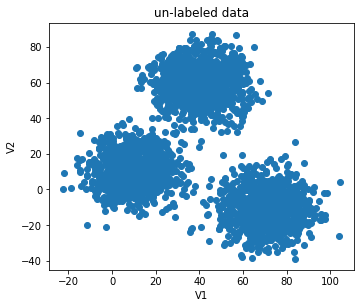

In [3]:
#visualize the data
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(12,10))
ax1=fig.add_subplot(221)
ax1.scatter(X['V1'],X['V2'])
ax1.set_title('un-labeled data')
ax1.set_xlabel('V1');ax1.set_ylabel('V2')

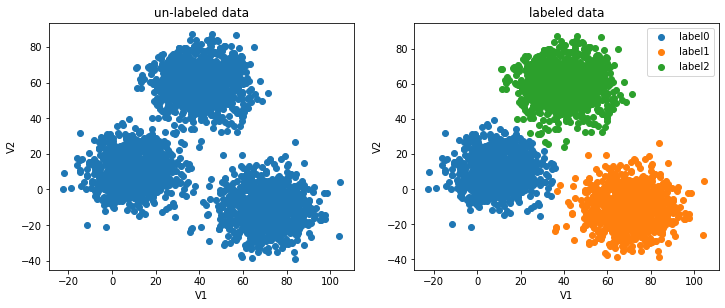

In [4]:
ax2=fig.add_subplot(222)
label0=ax2.scatter(X['V1'][y==0],X['V2'][y==0])
label1=ax2.scatter(X['V1'][y==1],X['V2'][y==1])
label2=ax2.scatter(X['V1'][y==2],X['V2'][y==2])
ax2.set_title('labeled data')
ax2.set_xlabel('V1');ax2.set_ylabel('V2')
ax2.legend((label0,label1,label2),('label0','label1','label2'))
fig

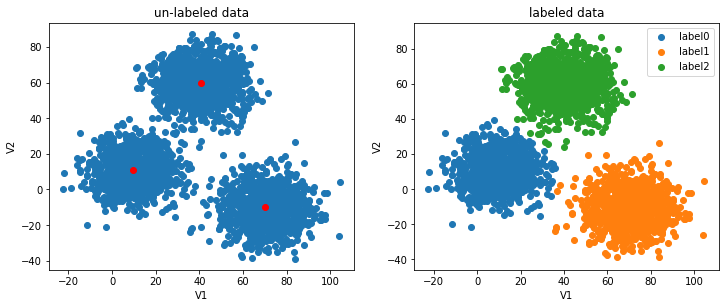

In [5]:
#set the model
from sklearn.cluster import KMeans
KM=KMeans(n_clusters=3,random_state=0)
KM.fit(X)
centers=KM.cluster_centers_
ax1.scatter(centers[:,0],centers[:,1],c='r')
fig

In [6]:
#test data: V1=80,V2=60
KM.predict([[80,60]])

array([1], dtype=int32)

In [7]:
#predict based on training data
y_predict=KM.predict(X)
from sklearn.metrics import accuracy_score
accuracy_score(y,y_predict)

0.0023333333333333335

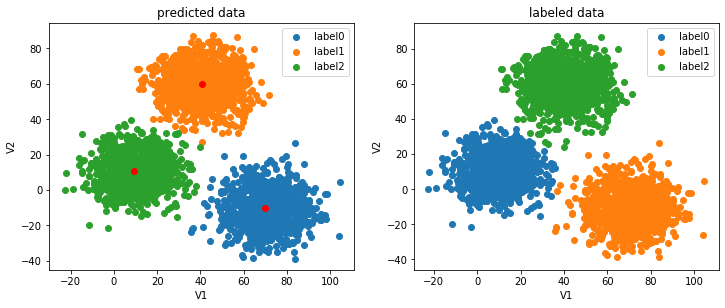

In [8]:
#visualize the data and results
ax1.clear()
label0=ax1.scatter(X['V1'][y_predict==0],X['V2'][y_predict==0])
label1=ax1.scatter(X['V1'][y_predict==1],X['V2'][y_predict==1])
label2=ax1.scatter(X['V1'][y_predict==2],X['V2'][y_predict==2])
ax1.set_title('predicted data')
ax1.set_xlabel('V1');ax1.set_ylabel('V2')
ax1.legend((label0,label1,label2),('label0','label1','label2'))
ax1.scatter(centers[:,0],centers[:,1],c='r')
fig

In [9]:
#correct the results
y_corrected=[]
for i in y_predict:
    if i==0:
        y_corrected.append(1)
    elif i==1:
        y_corrected.append(2)
    elif i==2:
        y_corrected.append(0)
y_corrected=np.array(y_corrected)
accuracy_score(y,y_corrected)

0.997

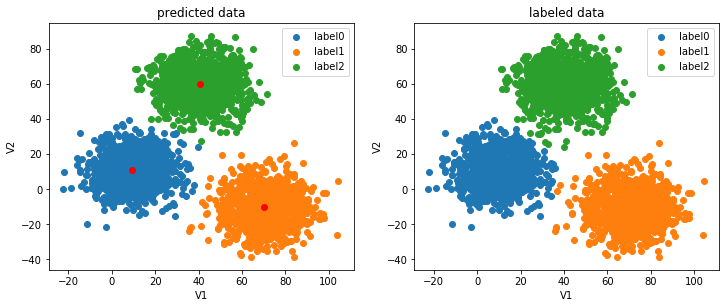

In [10]:
ax1.clear()
label0=ax1.scatter(X['V1'][y_corrected==0],X['V2'][y_corrected==0])
label1=ax1.scatter(X['V1'][y_corrected==1],X['V2'][y_corrected==1])
label2=ax1.scatter(X['V1'][y_corrected==2],X['V2'][y_corrected==2])
ax1.set_title('predicted data')
ax1.set_xlabel('V1');ax1.set_ylabel('V2')
ax1.legend((label0,label1,label2),('label0','label1','label2'))
ax1.scatter(centers[:,0],centers[:,1],c='r')
fig

In [13]:
#establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5)
KNN.fit(X,y)
#predict based on training data
y_predict_knn=KNN.predict(X)
accuracy_score(y,y_predict_knn)

0.9993333333333333

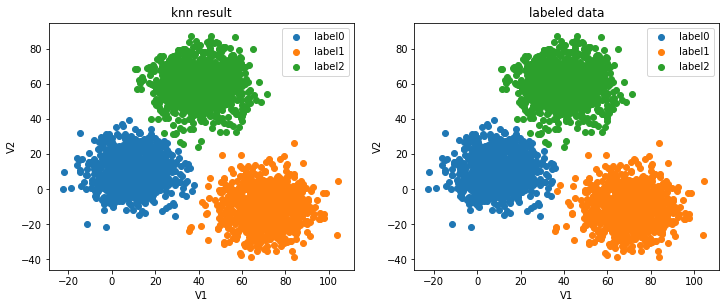

In [15]:
ax1.clear()
label0=ax1.scatter(X['V1'][y_predict_knn==0],X['V2'][y_predict_knn==0])
label1=ax1.scatter(X['V1'][y_predict_knn==1],X['V2'][y_predict_knn==1])
label2=ax1.scatter(X['V1'][y_predict_knn==2],X['V2'][y_predict_knn==2])
ax1.set_title('knn result')
ax1.set_xlabel('V1');ax1.set_ylabel('V2')
ax1.legend((label0,label1,label2),('label0','label1','label2'))
fig

In [17]:
#try meanshift model
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw=estimate_bandwidth(X,n_samples=500)
bw

30.84663454820215

In [22]:
#establish the meanshift model
ms=MeanShift(bandwidth=bw)
ms.fit(X)
y_predict_ms=ms.predict(X)
#correct 
#略

In [29]:
centers2=ms.cluster_centers_
print(centers,'\n\n',centers2)

[[ 69.92418447 -10.11964119]
 [ 40.68362784  59.71589274]
 [  9.4780459   10.686052  ]] 

 [[ 40.60158864  59.65137971]
 [ 70.01854306 -10.11803404]
 [  9.56752568  10.79316266]]


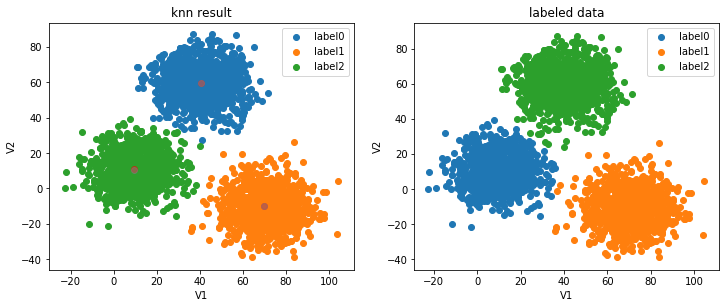

In [39]:
ax1.clear()
label0=ax1.scatter(X['V1'][y_predict_ms==0],X['V2'][y_predict_ms==0])
label1=ax1.scatter(X['V1'][y_predict_ms==1],X['V2'][y_predict_ms==1])
label2=ax1.scatter(X['V1'][y_predict_ms==2],X['V2'][y_predict_ms==2])
ax1.set_title('knn result')
ax1.set_xlabel('V1');ax1.set_ylabel('V2')
ax1.legend((label0,label1,label2),('label0','label1','label2'))
ax1.scatter(centers2[:,0],centers2[:,1],c='red',alpha=0.5)
ax1.scatter(centers[:,0],centers[:,1],c='gray',alpha=0.5)
fig